## Lexy Feldmann<br>Restaurant Satisfaction EDA & Prediction

### <font color='#6CA6CD'>1. 250-500 word narrative describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model.

Running a restaurant can be a great way to make money, but it's not just about serving good food and having good ambiance. There are a lot of ways a customer can have a bad experience at a restaurant, but some things are out of the restaurant's control. These things can be subconscious to the customer, like how many people they brought with them to enjoy the food, or what type of occasion they are celebrating by going to the restaurant? We know that things like the price of the food, how long they had to wait for their orders, or if they are a loyalty member or not are all easy factors to identify if someone is going to like their experience at a restaurant or not. These are not the factors this research is going to focus on. This research aims to focus on the factors that the restaurant simply cannot control, but can account for. One may not realize it, but the amount of people you cart along with you to a restaurant could affect your mood towards the restaurant itself. Maybe you came with your three screaming kids or your partner that you are arguing with. Maybe the reason you are coming to the restaurant at all will affect how much you are going to like your experience. These things can all subconsciously affect your attitude towards a restaurant and therefore the satisfaction rating you give it. This analysis attempts to explain restaurant ratings based on how many people are in your group at the time of going to the restaurant, what the occasion is that you are there for, and what time of day you are coming into the restaurant. These findings will aim to help owners market their restaurants in ways that attract the happiest customers, as well as help boost the ratings of customers who may need a little more attention during their time at the establishment.

### <font color='#6CA6CD'>2. Do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing.

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the csv data from my desktop
restaurant_data = pd.read_csv("https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/restaurant_customer_satisfaction.csv")

# Print the first five rows to make sure it imported properly
restaurant_data.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


#### <font color='gray'> i. Bar Graph of Average Satisfaction Rating by Group Size

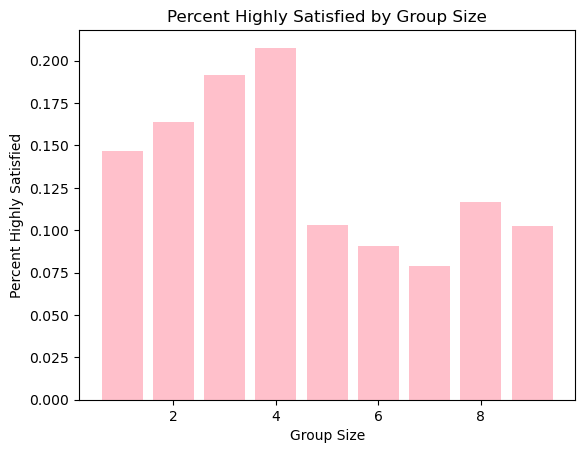

In [3]:
# Grab the mean for the HighSatisfaction column and group by the GroupSize column to get the mean for every group size
group_ratings = restaurant_data.groupby('GroupSize')['HighSatisfaction'].mean()

# Set the labels to be the index of each group_ratings value
labels = group_ratings.index

# Set the values to be the mean of each group_ratings value
values = group_ratings.values

# Plot the data in a bar graph visual, add labels and pink color
plt.bar(labels, values, color='pink')

# Adding a descriptive title and x and y-axis labels
plt.title('Percent Highly Satisfied by Group Size')
plt.ylabel('Percent Highly Satisfied')
plt.xlabel('Group Size')

# Show the graph
plt.show()

This graph shows that that are differences in how satisifed different group sizes are when they go to a restaurant. The trend seems to be that groups smaller than or equal to 4 people are more satisfied at these restaurants than groups larger than 4 people. This could be because bigger families/groups tend to have more conversation or more things going on at one time, which could make it harder to feel more relaxed and content. This also opens the door for more errors: More people to serve equals more of a chance to mess something up for the employees.

#### <font color='gray'>ii. Bar Graph of Average Satisfaction Rating by Dining Occasion

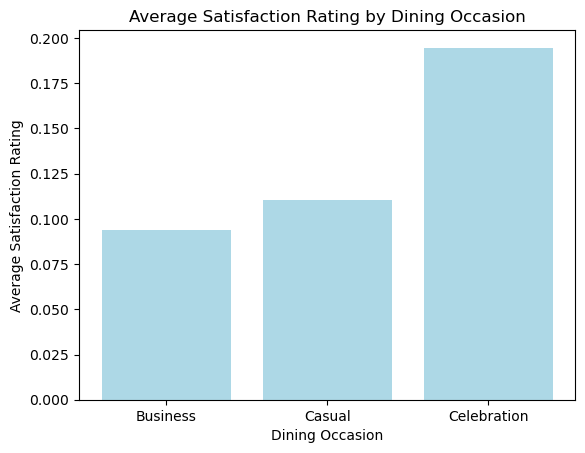

In [4]:
# Grab the mean for the HighSatisfaction column and group by the DiningOccasion column to get the mean for every occasion
occasion_ratings = restaurant_data.groupby('DiningOccasion')['HighSatisfaction'].mean()

# Set the labels to be the index of each occasion_ratings value
labels = occasion_ratings.index

# Set the values to be the mean of each occasion_ratings value
values = occasion_ratings.values

# Plot the data in a bar graph visual, add labels and color
plt.bar(labels, values, color='lightblue')

# Adding a descriptive title and x and y-axis labels
plt.title('Average Satisfaction Rating by Dining Occasion')
plt.ylabel('Average Satisfaction Rating')
plt.xlabel('Dining Occasion')

# Show the graph
plt.show()

The results from this graph show us that those who come to a restaurant and are celebrating a certain occasion are more likely to rate the restaurant higher than those who come for a business or casual reason. This makes a lot of sense, as individuals who are celebrating are more likely to be in a better mood when they come to a restaurant, which can correspond to a higher satisfaction rating.

#### <font color='gray'>iii. Pie Chart for Satisfied Small Groups and their Restaurant Visit Frequency

In [5]:
# Filter down the dataframe to customers who visited with a group size of 4 or less and rated their satisfaction as HIGH
satisfied_small_groups = restaurant_data[(restaurant_data['GroupSize'] <= 4) & (restaurant_data['HighSatisfaction'] == 1)]

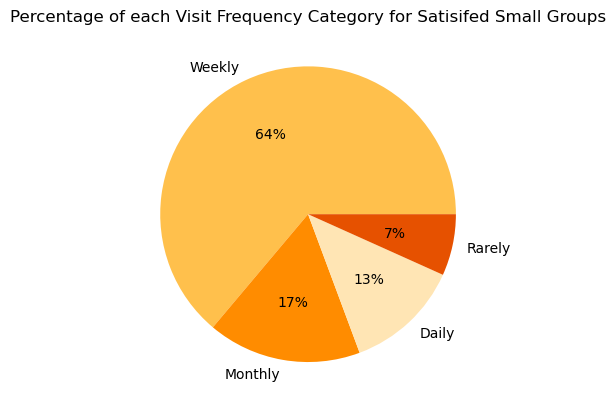

In [6]:
# Using this new dataframe, grab the counts for each value in the VisitFrequency column
frequency_counts = satisfied_small_groups['VisitFrequency'].value_counts()

# Set the labels to be the index of each frequency_counts value
labels = frequency_counts.index

# Set the values to the count of each frequency_counts value
values = frequency_counts.values

# Create the pie chart using the two variables just created
plt.pie(values, labels=labels, autopct='%1.0f%%', colors= ['#FFC04C', '#FF8C00', '#FFE5B4', '#E65100']) # Set colors

# Add a descriptive title to the pie chart
plt.title('Percentage of each Visit Frequency Category for Satisifed Small Groups')

# Show the chart
plt.show()

This shows us that of the groups that go to a restaurant that are smaller and mark highly satisfied on their survey, most of them visit the restaurant on a weekly basis. This means that the smaller groups (four or less people) that mark Highly Satisfied are more likely to be regular customers than not. This could help marketing teams know to have weekly deals to keep these customers happy and coming back to their restaurant.

#### <font color='gray'>iv. Weekly Satisfied Visitors and their Time Of Visit Percentages

In [7]:
# Filter the dataset down to weekly customers who have a high satisfaction rating of 1
weekly_visits = restaurant_data[(restaurant_data['VisitFrequency'] == 'Weekly')
                                & (restaurant_data['HighSatisfaction'] == 1)]

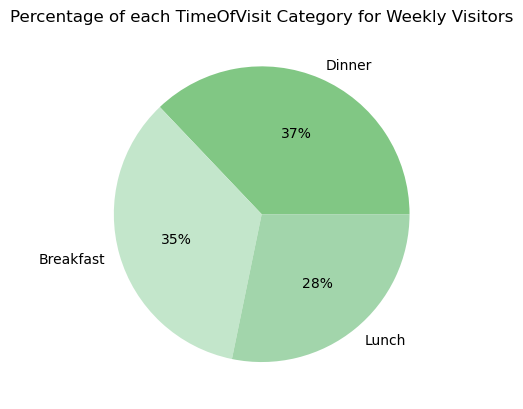

In [8]:
# Using this new dataframe, grab the counts for each value in the TimeOfVisit column
frequency_counts = weekly_visits['TimeOfVisit'].value_counts()

# Set the labels to be the index of each frequency_counts value
labels = frequency_counts.index

# Set the values to the count of each frequency_counts value
values = frequency_counts.values

# Create the pie chart using the two variables just created
plt.pie(values, labels=labels, autopct='%1.0f%%', colors= ['#81C784', '#C3E6CB', '#A2D5AB']) # Set colors

# Add a descriptive title to the pie chart
plt.title('Percentage of each TimeOfVisit Category for Weekly Visitors')

# Show the chart
plt.show()

This shows us that of the most common frequency visit category (weekly), these weekly customers who rate their time at the restaurant as highly satisfied most often than not come in for dinner or breakfast. This could let the restaurant know to target the deals to their weekly customers for breakfast and dinner, and not as much for lunch.

### <font color='#6CA6CD'>3. Write a short overview/conclusion of the insights gained from your graphical analysis.

The first graph shows us that as group size at a restaurant goes up (after 4), the satisfaction rating goes down. This can let employees for a restaurant know to pay extra close attention to groups larger than 4 to help them have a better experience. In commercials for the restaurant, the marketing team could show groups of four or less people enjoying the food, as a way to subliminally market to smaller groups of people coming to their restaurant. This would make customers happy, satisfaction ratings go up, and therefore make more revenue for the restuarant. Our second graph shows that individuals who come to the restaurant as a way of celebrating something are more likely to have a higher satisfaction rating (on average). This makes sense, as individuals who come to the restaurant are probably already in a better mood, and are therefore more likely to have a better experience. Marketing teams for the restaurant could showcase their restaurant as a great place for celebrations, and they could tell their employees to ask individuals why they came to/ordered from the restaurant. If a customer says that they came for a casual visit, employees could pay extra special attention to those patrons in order to get their satisfaction ratings higher. The third graph shows us that of the smaller groups (four or less customers) who rated a 1 in the Higher Satisfaction category (meaning they were highly satisfied), 64% of them attend the restaurant weekly. If we look at this from a broader scale, taking the filters off the dataset, we do see that most customers come on a weekly basis. The restaurant could use this insight as a way to market for weekly deals that keep people coming back, as well as keep their weekly customers happy. The final graph shows us that those who visit on a weekly basis and have a satisfaction score of 1 mainly come during breakfast or dinner. This can also help the restaurants to know to market more for breakfast and dinner specials, and not as much for lunchtime. 

## 7.2 Exercise: Term Project Milestone 2: Data Preparation

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

### <font color='#C8A2C8'>1. Drop unnecessary features

In [10]:
# Drop unnecessary features from the dataframe
restaurant_data = restaurant_data.drop(['CustomerID', 'PreferredCuisine','LoyaltyProgramMember', 'DeliveryOrder',
                                        'WaitTime', 'OnlineReservation', 'AverageSpend', 'MealType', 'ServiceRating',
                                        'FoodRating', 'AmbianceRating'], axis=1)

# Print the dataframe to view the changes
restaurant_data.head()

,Age,Gender,Income,VisitFrequency,TimeOfVisit,GroupSize,DiningOccasion,HighSatisfaction
0,35,Male,83380,Weekly,Breakfast,3,Business,0
1,19,Male,43623,Rarely,Dinner,1,Casual,0
2,41,Female,83737,Weekly,Dinner,6,Celebration,0
3,43,Male,96768,Rarely,Lunch,1,Celebration,0
4,55,Female,67937,Monthly,Breakfast,1,Business,0


**CustomerID:** Unnecessary to have in the dataset. Gives us no insight.

**PreferredCuisine:** We have no interest in seeing the effects of a customer's 'preferred cuisine' on the HighSatisfaction rating. This will add no insight into how to make the restaurant better. If the restaurant is a chinese place, it will not just change it's entire brand (and the food it serves) based on people's cuisine preference.

**LoyaltyProgramMember:** These customers are more likely to rate higher, as those who have loyalty accounts are probably more likely to enjoy the place they have the account for than those who don't. This would not give us any valuable insight into the HighSatisfaction rating and how to improve the restaurant.

**DeliveryOrder:** This may tell us if the restaurant does better with deliveries versus pickups/in store purchases, however that is something we can control and therefore would not give us any insight into how to better market the restaurant (as the owners probably do not want to move the restaurant to delivery only or in-store only).

**WaitTime:** This is something that the restaurant employees/owner can control for, therefore we are not measuring it.

**OnlineReservation:** This may tell us if the restaurant does better with individuals who book a reservation before coming in, however does not give us much insight into how to better market the restaurant to solve for the things we cannot control.

**AverageSpend:** We are not measuring how much someone spends at the restaurant in correlation to how much they enjoyed their time there.

**MealType:** This may tell us if the restaurant does better with individuals who dine in versus takeout, however does not give us much insight into how to better market the restaurant to solve for the things we cannot control.

**ServiceRating, FoodRating, AmbianceRating:** These are all things the restaurant can control. They can have better service, make better food, and create a better restaurant environment, therefore we are not measuring them against satisfaction.

### <font color='#C8A2C8'>2. Create dummy variables for categorical columns

In [11]:
# Create dummy variables for gender
restaurant_data = pd.get_dummies(restaurant_data, columns=['Gender'], drop_first=True)

# Create dummy variables for visitfrequency
restaurant_data = pd.get_dummies(restaurant_data, columns=['VisitFrequency'], drop_first=True)

# Create dummy variables for diningoccasion
restaurant_data = pd.get_dummies(restaurant_data, columns=['DiningOccasion'], drop_first=True)

# Create dummy variables for MealType
restaurant_data = pd.get_dummies(restaurant_data, columns=['TimeOfVisit'], drop_first=True)

# Print the first five rows to view the change
restaurant_data.head()

,Age,Income,GroupSize,HighSatisfaction,Gender_Male,VisitFrequency_Monthly,VisitFrequency_Rarely,VisitFrequency_Weekly,DiningOccasion_Casual,DiningOccasion_Celebration,TimeOfVisit_Dinner,TimeOfVisit_Lunch
0,35,83380,3,0,True,False,False,True,False,False,False,False
1,19,43623,1,0,True,False,True,False,True,False,True,False
2,41,83737,6,0,False,False,False,True,False,True,True,False
3,43,96768,1,0,True,False,True,False,False,True,False,True
4,55,67937,1,0,False,True,False,False,False,False,False,False


These categorical columns needed to be converted to numerical because linear regression models requires numerical input. Creating dummy variables for these columns ensures that the model can interpret them properly.

### <font color='#C8A2C8'>3. Split the data up into training and test set data

In [12]:
# Grab the features of the data
features = restaurant_data.drop('HighSatisfaction', axis=1)  # Features (all columns except 'HighSatisfaction')

# Grab the target of the data
target = restaurant_data['HighSatisfaction'] # The HighSatisfaction column

# Split the data into 80% training and 20% testing
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, # 20% test data
                                                                            random_state=42)

Splitting the data into 80% training and 20% testing data prepares the data to be used in the Linear Regression model in the next step. By having 80% of the data used for training helps the model learn patterns and relationships in the dataset. The rest will be used to evaluate the model's performance on unseen (new) data. This is to help in assessing how well the model is able to generalize beyond what it was trained on.

## 9.2 Exercise: Term Project Milestone 3: Model Building and Evaluation

In [13]:
# Import the necessary libraries for this milestone
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve

#### Train a logistic regression model

In [14]:
# Create a pipeline with StandardScaler and LogisticRegression
# Because we have way more instances of 0 in the dataset for the HighSatisfaction column than we do 0, use class_weight
# equals 'balanced' to focus more on the minority class, which will improve its performance on class 1.
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced')
)

# Train the model using the training data
lr_model = pipeline.fit(features_train, target_train)

#### Grab the model accuracy

In [15]:
# Evaluate the model using the test data
accuracy = lr_model.score(features_test, target_test)

# Print the accuracy score of the model
print("Model accuracy:", accuracy)

Model accuracy: 0.6066666666666667


#### Grab the classification report for this model

In [16]:
# Predict the labels for the test set
predictions = lr_model.predict(features_test)

# Generate the classification report
report = classification_report(target_test, predictions)

# Print the classification report to see how well the model performed
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72       259
           1       0.22      0.73      0.34        41

    accuracy                           0.61       300
   macro avg       0.58      0.66      0.53       300
weighted avg       0.83      0.61      0.67       300



Not happy with this... can definitely improve the performance of predictions for class 1.

#### Find the optimal threshold for the model

In [17]:
# Get predicted probabilities for each class in the test set
# Each row will correspond to sample data and contains probability of class 0 and class 1
probabilities = pipeline.predict_proba(features_test)[:, 1]

# Compute precision, recall, and thresholds using the function precision_recall_curve
# The target_test is used to show the true labels for the test data and then the probabilities are those that are predicted
model_precision, model_recall, model_thresholds = precision_recall_curve(target_test, probabilities)

# Calculation to find the f1 score for each threshold
model_f1_scores = (2 * (model_precision * model_recall)) / (model_precision + model_recall)

# Finds index of the highest f1 score and stores it in optimal_idx variable
optimal_idx = np.argmax(model_f1_scores)

# Grab the most optimal threshold based on the corresponding index and store it in optimal_threshold variable
optimal_threshold = model_thresholds[optimal_idx]

# Print the optimal threshold found
print('Optimal Threshold:', optimal_threshold)

Optimal Threshold: 0.6547738664213585


#### Use optimal threshold in getting new predictions for model

In [18]:
# Now get the predicitions using the optimal_threshold variable
# This will compare each probability to the threshold, and will result in a true or false boolean where true means that the
# probability is above the threshold and false is not
predictions = (probabilities >= optimal_threshold).astype(int) # convert to an int which represents the class labels

#### Get the classification report using those predictions

In [19]:
# Generate the classification report
report = classification_report(target_test, predictions)

# Print the classification report to see how well the model performed with the adjusted threshold
print('Classification Report with Adjusted Threshold:\n\n', report)

Classification Report with Adjusted Threshold:

               precision    recall  f1-score   support

           0       0.92      0.87      0.89       259
           1       0.39      0.54      0.45        41

    accuracy                           0.82       300
   macro avg       0.66      0.70      0.67       300
weighted avg       0.85      0.82      0.83       300



#### Get the accuracy score using those predictions

In [20]:
# Calculate the accuracy score
accuracy = accuracy_score(target_test, predictions)

# Print the accuracy score
print('Accuracy Score with Adjusted Threshold:', accuracy)

Accuracy Score with Adjusted Threshold: 0.8233333333333334


#### Find the coefficents for how the features are influencing HighSatisfaction

In [21]:
# Get the logistic regression model from the pipeline
logistic_regression_model = lr_model.named_steps['logisticregression']

# Get the coefficients and feature names
coefficients = logistic_regression_model.coef_[0]

# Get the names of the features (columns from features_train)
feature_names = features_train.columns

# Create a DataFrame to display the coefficients and their feature names
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the most influential features
print(coeff_df[['Feature', 'Coefficient']])

                       Feature  Coefficient
0                          Age     0.144941
1                       Income     0.211599
2                    GroupSize    -0.291441
3                  Gender_Male    -0.008319
4       VisitFrequency_Monthly    -0.245034
5        VisitFrequency_Rarely    -0.386529
6        VisitFrequency_Weekly     0.248578
7        DiningOccasion_Casual     0.128529
8   DiningOccasion_Celebration     0.399183
9           TimeOfVisit_Dinner     0.007926
10           TimeOfVisit_Lunch    -0.079779


### Model justification and conclusion

The reason a logistic regression model was used for this dataset was for a number of reasons. Logistic regressions model the probability of the target class, which in my case is the HighSatisfaction column. It makes it easy to see the probabilities for that column and how predictable the value will be based on the different features (all other columns). This makes it easy to understand and explain when trying to better understand how a variable comes to be. In this case, we are trying to be able to accurately predict someone's satisfaction level based on all other columns, which are more so things outside of the restaurant-owners control. The logistic regression model made it really easy to see how the model performed and what the results mean. As for the obvious, logistic regressions are used for binary classification tasks. In this case, I am only looking at values of 0 or 1 in the HighSatisfaction column, so logistic regression fit the bill for that as well.

As for the results of the model and its final predictions, it was found that the overall accuracy was 82%, meaning that my model was able to accurately predict the HighSatisfaction column based on the other features in the dataset 82% of the time. This is a good accuracy score, and it does show very strong performance for class 0. The classification report showed that, for class 0, the model's predictions are right 92% of the time. It also reports that, out of all the actual instances of class 0, the model correctly identifies 87% of them. These are high numbers, which indicates a strong performance for this class. This means that the model can strongly predict when someone is going to indicate that they were not highly satisfied by the restaurant based on features outside of the restaurant's control. As for class 1, the classification report showed that when the model predicts this class it is only correct 39% of the time. It's recall was 0.54, meaning that out of all the actual instances of class 1, the model correctly identified 54% of them. The f1-score is also 0.45, showing room for improvement for class 1. This may just mean that it is harder to predict when someone is going to be highly satisfied with the restaurant based on features outside of the restaurant's control.

I did try to use feature selection and even tried methods of handling class imbalance (since I know that class 1 is smaller than class 0), but nothing gave me a better classification report and accuracy (combined) than the code I have above - so I didn't include all that. I will take suggestions on how to make the predictions on class 1 better, as I just couldn't seem to do so!